# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Untuk preprocessing nanti
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("Semua library berhasil diimport!")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")


Semua library berhasil diimport!
Pandas version: 2.3.3
Numpy version: 2.4.0


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Load dataset dari file CSV
try:
    df = pd.read_csv('../diabetes.csv')
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print("File diabetes.csv tidak ditemukan!")
    print("Pastikan file ada di folder yang sama dengan notebook ini.")
    # Buat dataset kecil sebagai fallback
    data = {
        'Pregnancies': [6, 1, 8, 1, 0],
        'Glucose': [148, 85, 183, 89, 137],
        'BloodPressure': [72, 66, 64, 66, 40],
        'SkinThickness': [35, 29, 0, 23, 35],
        'Insulin': [0, 0, 0, 94, 168],
        'BMI': [33.6, 26.6, 23.3, 28.1, 43.1],
        'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288],
        'Age': [50, 31, 32, 21, 33],
        'Outcome': [1, 0, 1, 0, 1]
    }
    df = pd.DataFrame(data)
    print("⚠️  Menggunakan dataset contoh (5 samples)")

# Tampilkan informasi dataset
print("\n" + "="*60)
print("INFORMASI DATASET")
print("="*60)
print(f"Shape dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

print("\nNama kolom:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("\nTipe data setiap kolom:")
print(df.dtypes)

print("\n5 baris pertama dataset:")
display(df.head())

print("\n5 baris terakhir dataset:")
display(df.tail())

Dataset berhasil dimuat!

INFORMASI DATASET
Shape dataset: (768, 9)
Jumlah baris: 768
Jumlah kolom: 9

Nama kolom:
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome

Tipe data setiap kolom:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

5 baris pertama dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



5 baris terakhir dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

EXPLORATORY DATA ANALYSIS (EDA)

STATISTIK DESKRIPTIF
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.76

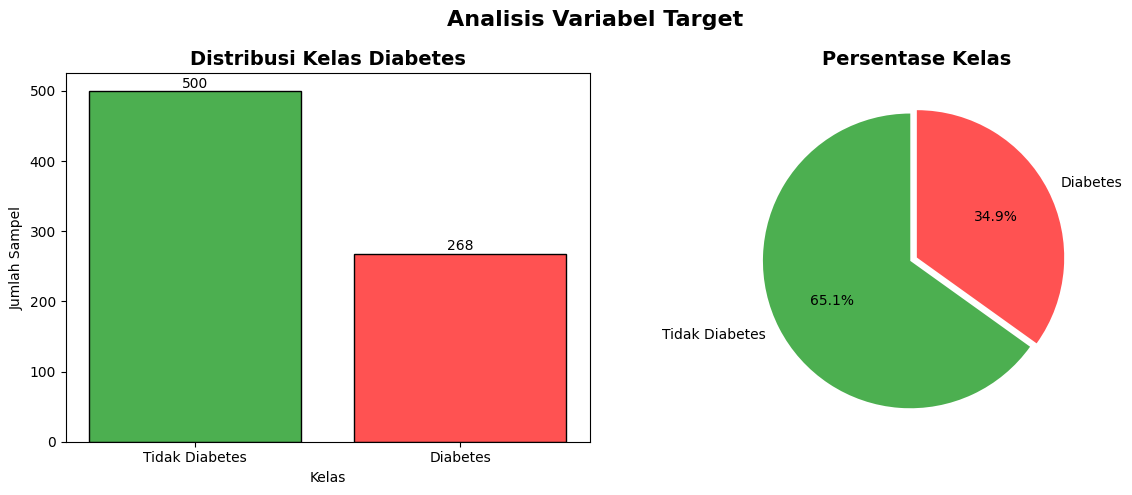


 MATRIKS KORELASI


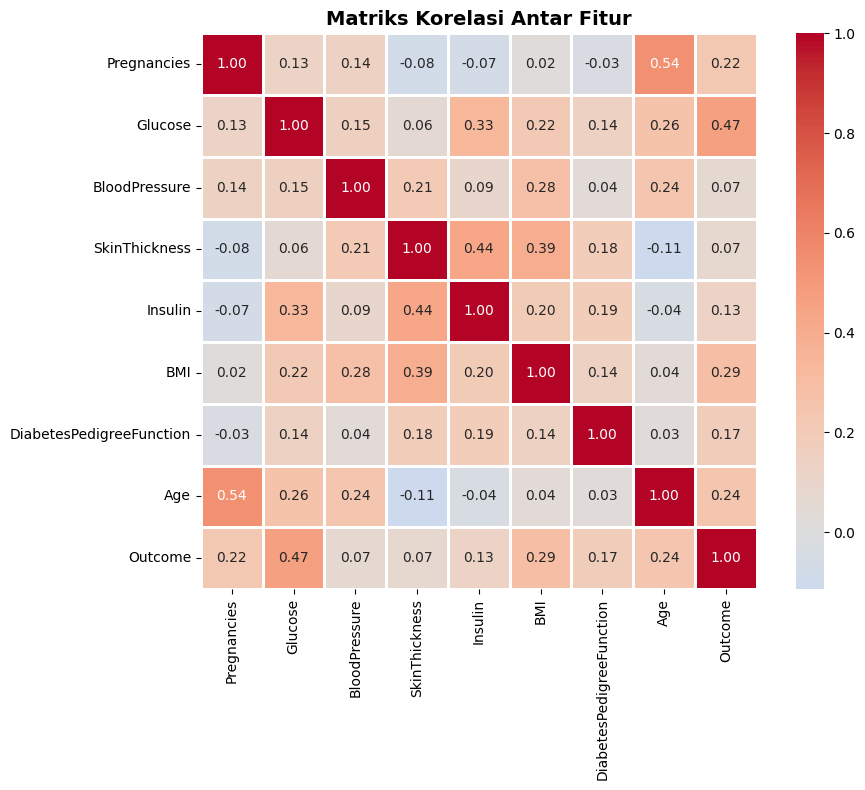


KORELASI DENGAN TARGET (Outcome)
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

DISTRIBUSI FITUR NUMERIK


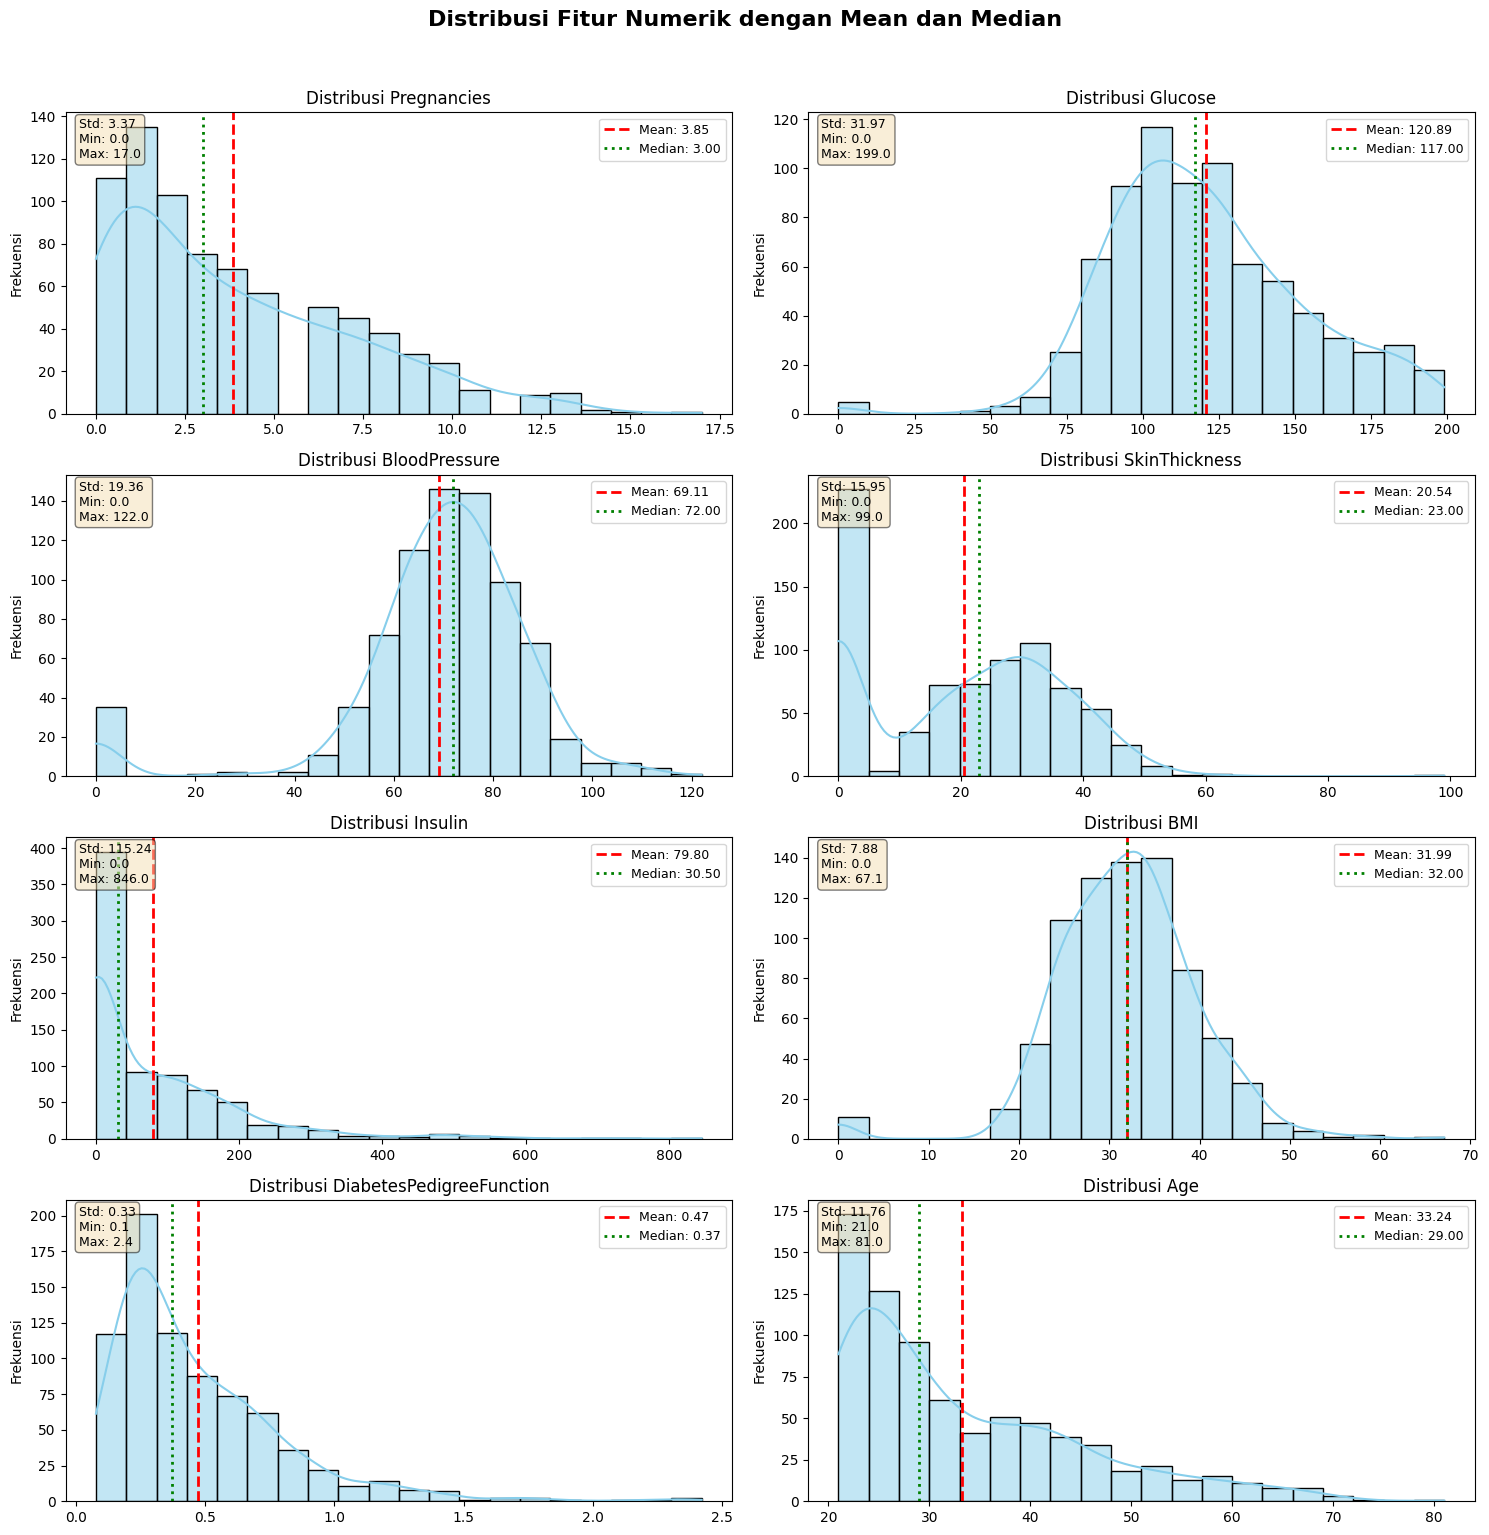


BOXPLOT UNTUK DETEKSI OUTLIER


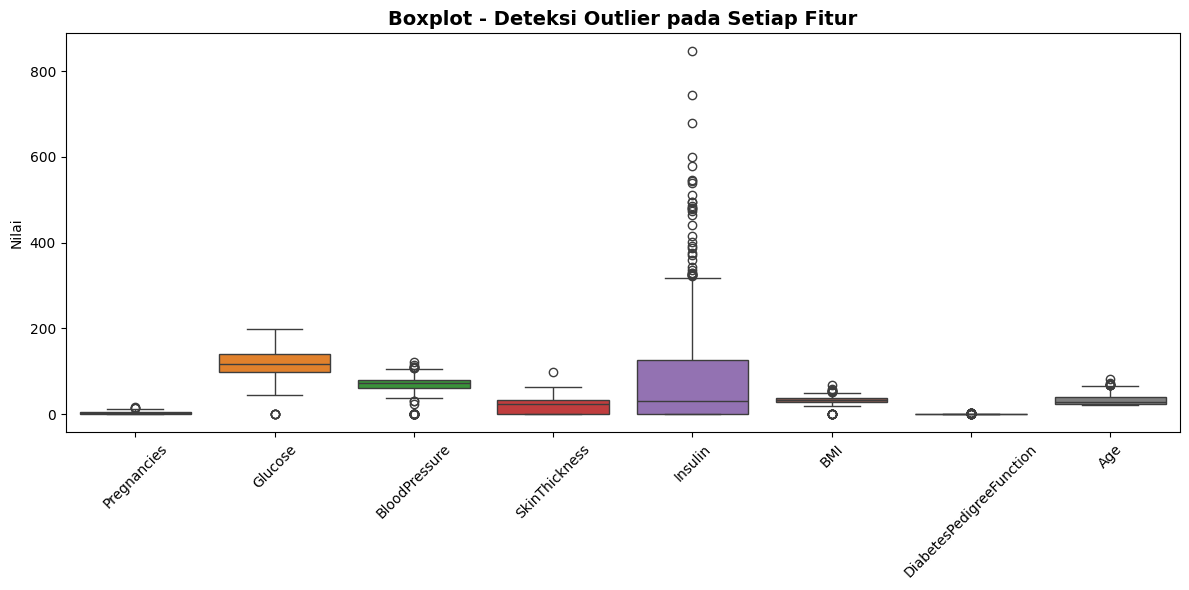


OUTLIER BERDASARKAN IQR METHOD
Pregnancies: 4 outlier (0.5%)
Glucose: 5 outlier (0.7%)
BloodPressure: 45 outlier (5.9%)
SkinThickness: 1 outlier (0.1%)
Insulin: 34 outlier (4.4%)
BMI: 19 outlier (2.5%)
DiabetesPedigreeFunction: 29 outlier (3.8%)
Age: 9 outlier (1.2%)


In [3]:
print("="*60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*60)

# 4.1 Statistik Deskriptif
print("\nSTATISTIK DESKRIPTIF")
print(df.describe())

# 4.2 Cek Missing Values
print("\nCEK MISSING VALUES")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("Tidak ada missing values")
else:
    print("Missing values per kolom:")
    print(missing_values[missing_values > 0])

# 4.3 Cek Nilai 0 (yang mungkin missing)
print("\nCEK NILAI 0 (potensi missing)")
zero_counts = {}
for col in df.columns[:-1]:  # Kecuali Outcome
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        percentage = (zero_count / len(df)) * 100
        zero_counts[col] = zero_count
        print(f"{col}: {zero_count} nilai 0 ({percentage:.1f}%)")

# 4.4 Distribusi Target Variable
print("\nDISTRIBUSI TARGET VARIABLE (Outcome)")
target_counts = df['Outcome'].value_counts()
print(f"0 (Tidak Diabetes): {target_counts[0]} samples")
print(f"1 (Diabetes): {target_counts[1]} samples")
print(f"Persentase: {target_counts[0]/len(df)*100:.1f}% vs {target_counts[1]/len(df)*100:.1f}%")

# Visualisasi distribusi target
plt.figure(figsize=(12, 5))

# Subplot 1: Bar chart
plt.subplot(1, 2, 1)
bars = plt.bar(['Tidak Diabetes', 'Diabetes'], target_counts.values, 
               color=['#4CAF50', '#FF5252'], edgecolor='black')
plt.title('Distribusi Kelas Diabetes', fontsize=14, fontweight='bold')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height}', ha='center', va='bottom')

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=['Tidak Diabetes', 'Diabetes'],
        autopct='%1.1f%%', colors=['#4CAF50', '#FF5252'],
        startangle=90, explode=(0.05, 0))
plt.title('Persentase Kelas', fontsize=14, fontweight='bold')

plt.suptitle('Analisis Variabel Target', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 4.5 Korelasi antar Fitur
print("\n MATRIKS KORELASI")
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            fmt='.2f', center=0, square=True, linewidths=1)
plt.title('Matriks Korelasi Antar Fitur', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Korelasi dengan target
print("\nKORELASI DENGAN TARGET (Outcome)")
corr_with_target = correlation_matrix['Outcome'].sort_values(ascending=False)
print(corr_with_target)

# 4.6 Distribusi Fitur Numerik
print("\nDISTRIBUSI FITUR NUMERIK")
numeric_features = df.columns[:-1]  # Semua kecuali Outcome

# Plot histogram untuk setiap fitur
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    ax = axes[idx]
    
    # Histogram dengan KDE
    sns.histplot(df[feature], kde=True, ax=ax, bins=20, color='skyblue')
    
    # Garis mean dan median
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
               label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle=':', linewidth=2,
               label=f'Median: {median_val:.2f}')
    
    ax.set_title(f'Distribusi {feature}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Frekuensi')
    ax.legend(fontsize=9)
    
    # Info statistik di plot
    stats_text = f"Std: {df[feature].std():.2f}\nMin: {df[feature].min():.1f}\nMax: {df[feature].max():.1f}"
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            verticalalignment='top', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Sembunyikan subplot yang tidak terpakai
for idx in range(len(numeric_features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Distribusi Fitur Numerik dengan Mean dan Median', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 4.7 Boxplot untuk Deteksi Outlier
print("\nBOXPLOT UNTUK DETEKSI OUTLIER")
plt.figure(figsize=(12, 6))
df_box = df.drop('Outcome', axis=1)
sns.boxplot(data=df_box)
plt.title('Boxplot - Deteksi Outlier pada Setiap Fitur', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Nilai')
plt.tight_layout()
plt.show()

# Hitung outlier menggunakan IQR method
print("\nOUTLIER BERDASARKAN IQR METHOD")
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    if len(outliers) > 0:
        print(f"{feature}: {len(outliers)} outlier ({len(outliers)/len(df)*100:.1f}%)")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

DATA PREPROCESSING
Dataset awal: (768, 9)

HANDLING NILAI 0 YANG TIDAK WAJAR
Kolom yang tidak mungkin bernilai 0:
  Glucose: 5 nilai 0 diganti dengan median 117.00
  BloodPressure: 35 nilai 0 diganti dengan median 72.00
  SkinThickness: 227 nilai 0 diganti dengan median 23.00
  Insulin: 374 nilai 0 diganti dengan median 30.50
  BMI: 11 nilai 0 diganti dengan median 32.00

CEK DAN HAPUS DUPLIKAT
  Tidak ditemukan duplikat
  Shape setelah cleaning: (768, 9)

MEMISAHKAN FITUR DAN TARGET
  Fitur (X): (768, 8)
  Target (y): (768,)
  Distribusi target: 0=500 (65.1%), 1=268 (34.9%)

FEATURE SCALING (Standardization)
  Contoh sebelum scaling:
    Glucose - Mean: 121.66, Std: 30.44
    BMI - Mean: 32.45, Std: 6.88

  Contoh setelah scaling:
    Glucose - Mean: 0.00, Std: 1.00
    BMI - Mean: 0.00, Std: 1.00

TRAIN-TEST SPLIT
  X_train: (614, 8) (79.9%)
  X_test: (154, 8) (20.1%)
  y_train: (614,)
  y_test: (154,)

  Distribusi kelas di training set:
    0: 400 samples (65.1%)
    1: 214 samples

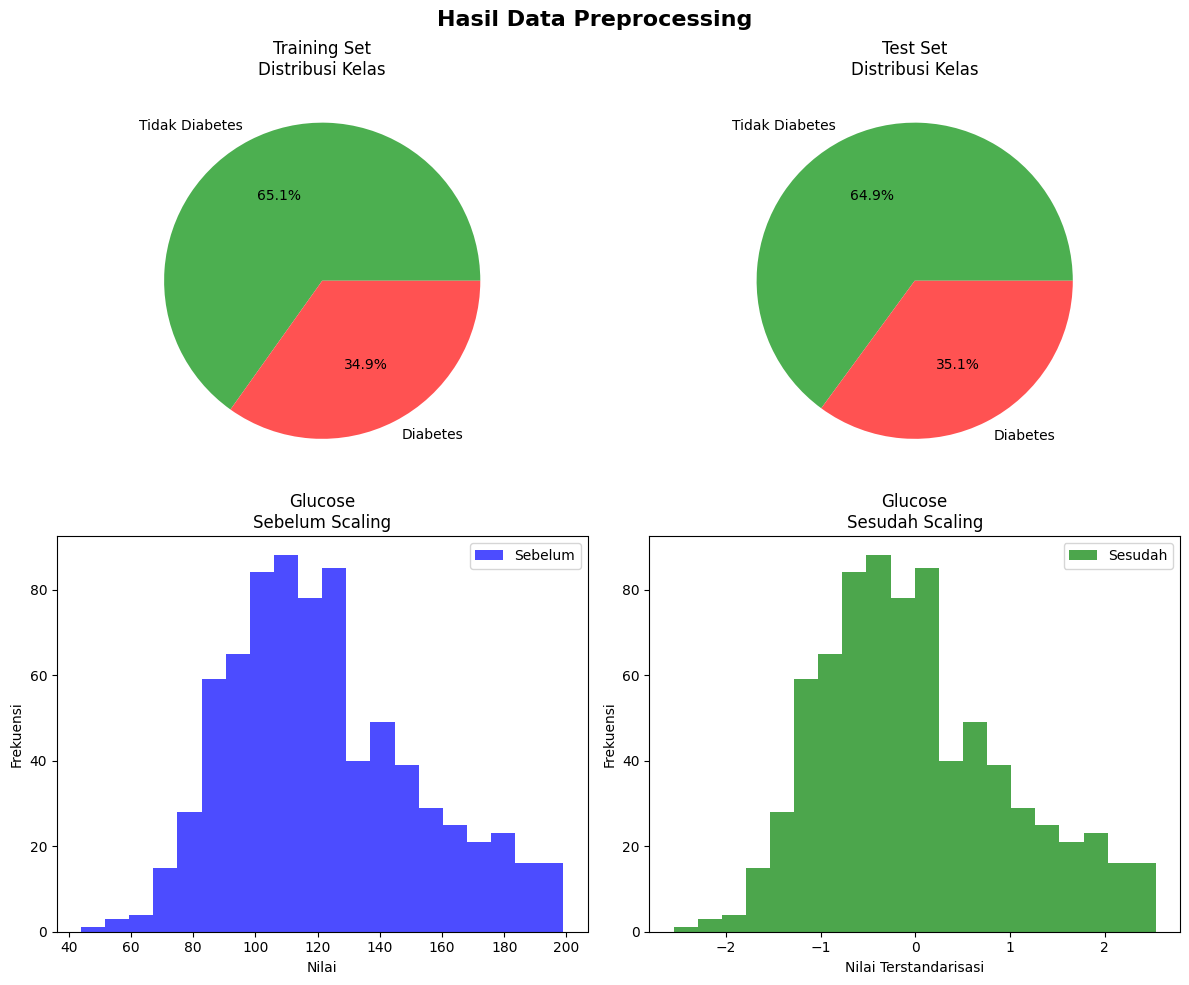

In [4]:
print("="*60)
print("DATA PREPROCESSING")
print("="*60)

# Buat copy dataset untuk preprocessing
df_processed = df.copy()
print(f"Dataset awal: {df_processed.shape}")

# 5.1 Handle Nilai 0 yang Tidak Wajar
print("\nHANDLING NILAI 0 YANG TIDAK WAJAR")
print("Kolom yang tidak mungkin bernilai 0:")

columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_fix:
    if col in df_processed.columns:
        zeros_count = (df_processed[col] == 0).sum()
        if zeros_count > 0:
            # Ganti 0 dengan median
            median_val = df_processed[col].median()
            df_processed[col] = df_processed[col].replace(0, median_val)
            print(f"  {col}: {zeros_count} nilai 0 diganti dengan median {median_val:.2f}")

# 5.2 Cek dan Hapus Duplikat
print("\nCEK DAN HAPUS DUPLIKAT")
duplicates = df_processed.duplicated().sum()
if duplicates > 0:
    df_processed = df_processed.drop_duplicates()
    print(f"  Ditemukan {duplicates} baris duplikat, telah dihapus")
else:
    print("  Tidak ditemukan duplikat")

print(f"  Shape setelah cleaning: {df_processed.shape}")

# 5.3 Pisahkan Fitur dan Target
print("\nMEMISAHKAN FITUR DAN TARGET")
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

print(f"  Fitur (X): {X.shape}")
print(f"  Target (y): {y.shape}")
print(f"  Distribusi target: 0={sum(y==0)} ({sum(y==0)/len(y)*100:.1f}%), "
      f"1={sum(y==1)} ({sum(y==1)/len(y)*100:.1f}%)")

# 5.4 Feature Scaling
print("\nFEATURE SCALING (Standardization)")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("  Contoh sebelum scaling:")
print(f"    Glucose - Mean: {X['Glucose'].mean():.2f}, Std: {X['Glucose'].std():.2f}")
print(f"    BMI - Mean: {X['BMI'].mean():.2f}, Std: {X['BMI'].std():.2f}")

print("\n  Contoh setelah scaling:")
print(f"    Glucose - Mean: {X_scaled['Glucose'].mean():.2f}, Std: {X_scaled['Glucose'].std():.2f}")
print(f"    BMI - Mean: {X_scaled['BMI'].mean():.2f}, Std: {X_scaled['BMI'].std():.2f}")

# 5.5 Train-Test Split
print("\nTRAIN-TEST SPLIT")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,          # 20% untuk testing
    random_state=42,        # Untuk reproducibility
    stratify=y              # Maintain class distribution
)

print(f"  X_train: {X_train.shape} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  X_test: {X_test.shape} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"  y_train: {y_train.shape}")
print(f"  y_test: {y_test.shape}")

print("\n  Distribusi kelas di training set:")
train_0 = sum(y_train == 0)
train_1 = sum(y_train == 1)
print(f"    0: {train_0} samples ({train_0/len(y_train)*100:.1f}%)")
print(f"    1: {train_1} samples ({train_1/len(y_train)*100:.1f}%)")

print("\n  Distribusi kelas di test set:")
test_0 = sum(y_test == 0)
test_1 = sum(y_test == 1)
print(f"    0: {test_0} samples ({test_0/len(y_test)*100:.1f}%)")
print(f"    1: {test_1} samples ({test_1/len(y_test)*100:.1f}%)")

# 5.6 Simpan Data yang Telah Diproses
print("\nMENYIMPAN DATA YANG TELAH DIPROSES")
import os
import joblib

# Buat folder untuk menyimpan data preprocessing
output_dir = '../diabetes_preprocessed'
os.makedirs(output_dir, exist_ok=True)

# Simpan data dalam format CSV
X_train.to_csv(f'{output_dir}/X_train.csv', index=False)
X_test.to_csv(f'{output_dir}/X_test.csv', index=False)
y_train.to_csv(f'{output_dir}/y_train.csv', index=False)
y_test.to_csv(f'{output_dir}/y_test.csv', index=False)

# Simpan scaler untuk digunakan nanti
joblib.dump(scaler, f'{output_dir}/scaler.pkl')

# Simpan informasi preprocessing
preprocessing_info = {
    'original_shape': df.shape,
    'processed_shape': df_processed.shape,
    'train_shape': X_train.shape,
    'test_shape': X_test.shape,
    'test_size': 0.2,
    'random_state': 42,
    'columns_fixed': columns_to_fix,
    'scaler': 'StandardScaler'
}

import json
with open(f'{output_dir}/preprocessing_info.json', 'w') as f:
    json.dump(preprocessing_info, f, indent=2)

print(f"  Data disimpan di folder: '{output_dir}'")
print("\n File yang disimpan:")
print(f"     - X_train.csv ({X_train.shape})")
print(f"     - X_test.csv ({X_test.shape})")
print(f"     - y_train.csv ({y_train.shape})")
print(f"     - y_test.csv ({y_test.shape})")
print(f"     - scaler.pkl (fitted StandardScaler)")
print(f"     - preprocessing_info.json (metadata)")

# 5.7 Visualisasi Hasil Preprocessing
print("\nVISUALISASI HASIL PREPROCESSING")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Distribusi kelas sebelum dan sesudah split
axes[0, 0].pie([train_0, train_1], labels=['Tidak Diabetes', 'Diabetes'],
              autopct='%1.1f%%', colors=['#4CAF50', '#FF5252'])
axes[0, 0].set_title('Training Set\nDistribusi Kelas')

axes[0, 1].pie([test_0, test_1], labels=['Tidak Diabetes', 'Diabetes'],
              autopct='%1.1f%%', colors=['#4CAF50', '#FF5252'])
axes[0, 1].set_title('Test Set\nDistribusi Kelas')

# Plot 2: Contoh fitur sebelum dan sesudah scaling
axes[1, 0].hist(X['Glucose'], bins=20, alpha=0.7, label='Sebelum', color='blue')
axes[1, 0].set_title('Glucose\nSebelum Scaling')
axes[1, 0].set_xlabel('Nilai')
axes[1, 0].set_ylabel('Frekuensi')
axes[1, 0].legend()

axes[1, 1].hist(X_scaled['Glucose'], bins=20, alpha=0.7, label='Sesudah', color='green')
axes[1, 1].set_title('Glucose\nSesudah Scaling')
axes[1, 1].set_xlabel('Nilai Terstandarisasi')
axes[1, 1].set_ylabel('Frekuensi')
axes[1, 1].legend()

plt.suptitle('Hasil Data Preprocessing', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()